In [1]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

from scipy import stats
# Regular expressions
import re
#import sweetviz
# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from category_encoders.one_hot import OneHotEncoder

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

import platform
from platform import python_version
import jupyterlab
print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
from sklearn.metrics import mean_squared_error

seaborn version	: 0.11.1
System
os name: nt
system: Windows
release: 10

Python
version: 3.8.8

Python Packages
jupterlab==3.0.14
pandas==1.2.4
numpy==1.20.1


In [178]:
churn_df= pd.read_csv(r'C:\Users\npand\OneDrive\Desktop\MS_Course\ES508\Data\CHURN.csv')
churn_df.shape


(5000, 21)

## EDA

<AxesSubplot:xlabel='Data Type'>

Text(0.5, 1.0, 'Summary of Data-Type of attributes')

Text(0, 0.5, 'No of attributes')

(array([0, 1, 2]),
 [Text(0, 0, 'Discreet'), Text(1, 0, 'Numerical'), Text(2, 0, 'categorical')])

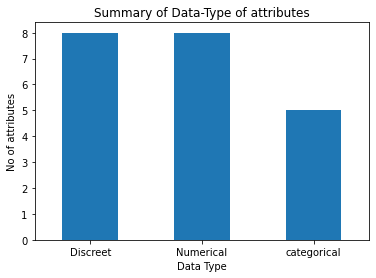

In [179]:
## For Data-type description

a=pd.DataFrame(churn_df.dtypes).rename(columns={0:'Data Type'})
mapd={'int64': 'Discreet','float64':'Numerical','object':'categorical'}
a=a['Data Type'].replace(mapd)
a=pd.DataFrame(a).rename(columns={0:'Data Type'})
a.groupby('Data Type').size().plot(kind='bar')
plt.title('Summary of Data-Type of attributes')
#plt.xlabel('Churn Status')
plt.ylabel('No of attributes')
plt.xticks(rotation=0) 
#plt.legend(loc='upper left')


In [180]:
## Changing the  targets 
churn_df.rename(columns={'Churn?':'Churn','Account Length':'Duration'},inplace=True)
churn_df['Churn']=np.where(churn_df.Churn=='True.',1,0)
churn_df_copy=churn_df.copy()
churn_df.head(2)
churn_df.Churn.value_counts(normalize=True)

,State,Duration,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,PA,163,806,403-2562,no,yes,300,8.1622,3,7.5792,3.9330,4,6.5086,4.0658,100,5.1116,4.9282,6,5.6732,3,1
1,SC,15,836,158-8416,yes,no,0,10.0190,4,4.2263,2.3250,0,9.9726,7.1410,200,6.4362,3.2217,6,2.5597,8,0


0   0.5004
1   0.4996
Name: Churn, dtype: float64

## EDA

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Day call duration distribution vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Day call charge distribution vs Churn Status')

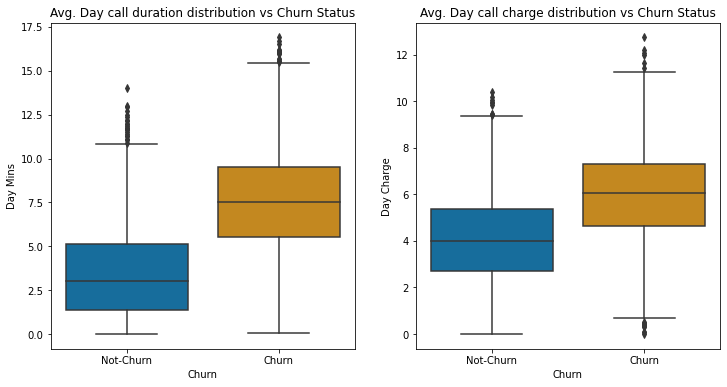

In [181]:
###  Day details

fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Day Mins',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg. Day call duration distribution vs Churn Status")
ar[1]=sns.boxplot(y='Day Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Day call charge distribution vs Churn Status")


[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg.number of Evening calls vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Evening call charge vs Churn Status')

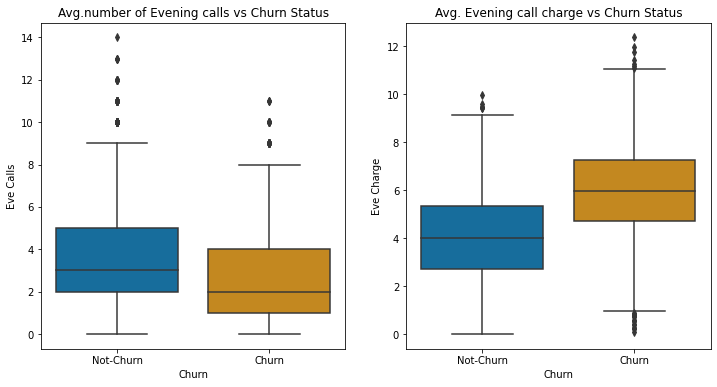

In [182]:
## Evening Features
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Eve Calls',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg.number of Evening calls vs Churn Status")
ar[1]=sns.boxplot(y='Eve Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Evening call charge vs Churn Status")
## It clearly shows that person having high Credit Limit are likely to pay. 
## There are few outliers in both groups

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. number of Night calls vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Night call charge vs Churn Status')

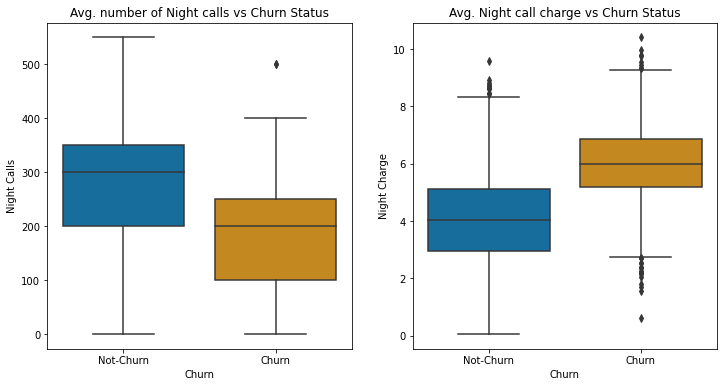

In [183]:
## Night features
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Night Calls',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg. number of Night calls vs Churn Status")
ar[1]=sns.boxplot(y='Night Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Night call charge vs Churn Status")

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Intl call duration vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Intl call charge vs Churn Status')

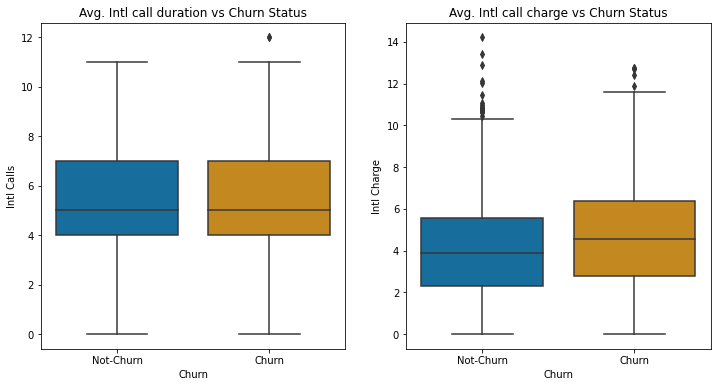

In [184]:
## International call features
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Intl Calls',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg. Intl call duration vs Churn Status")
ar[1]=sns.boxplot(y='Intl Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Intl call charge vs Churn Status")

<AxesSubplot:xlabel='Night Charge', ylabel='Density'>

<AxesSubplot:xlabel='Night Charge', ylabel='Density'>

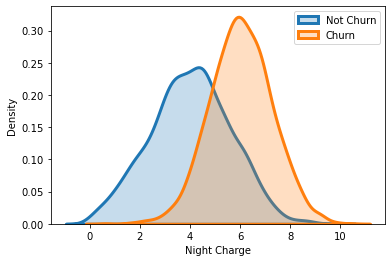

In [185]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Night Charge']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Night Charge']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()

<AxesSubplot:xlabel='CustServ Calls Bin', ylabel='Density'>

<AxesSubplot:xlabel='CustServ Calls Bin', ylabel='Density'>

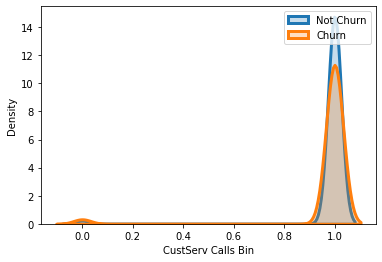

In [186]:
churn_df['CustServ Calls Bin']= 0
churn_df.loc[churn_df['CustServ Calls']>=2, 'CustServ Calls Bin']=1

x1 = churn_df.loc[churn_df['Churn'] == 1, 'CustServ Calls Bin']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'CustServ Calls Bin']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()

<AxesSubplot:xlabel='Day Mins', ylabel='Density'>

<AxesSubplot:xlabel='Day Mins', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Day call duration (mins) ')

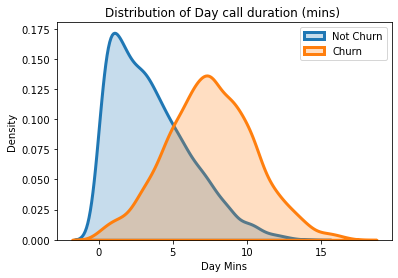

In [187]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Day Mins']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Day Mins']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()
plt.title("Distribution of Day call duration (mins) ")

<AxesSubplot:xlabel='Eve Mins', ylabel='Density'>

<AxesSubplot:xlabel='Eve Mins', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Evening call duration (mins) ')

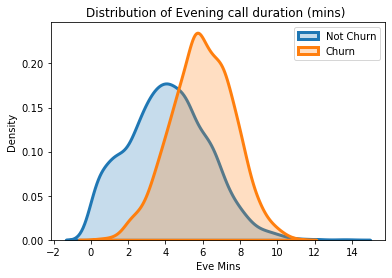

In [188]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Eve Mins']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Eve Mins']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()
plt.title("Distribution of Evening call duration (mins) ")

<AxesSubplot:xlabel='Night Calls', ylabel='Density'>

<AxesSubplot:xlabel='Night Calls', ylabel='Density'>

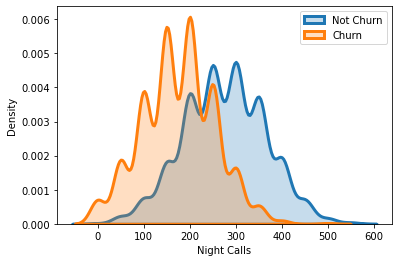

In [189]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Night Calls']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Night Calls']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()


<AxesSubplot:xlabel='VMail Message Category'>

Text(0, 0.5, 'Churn rate (%)')

Text(0.5, 1.0, 'Churn rate for VMail messages Category')

Text(0, 0.5, 'Churn rate (%)')

(array([0, 1]),
 [Text(0, 0, 'Less than 200 msgs'), Text(1, 0, 'More than 200 msgs')])

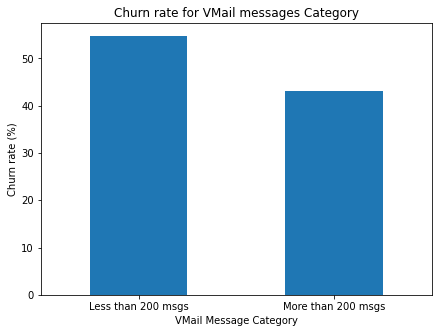

In [190]:
churn_df['VMail Message Category']= 'Less than 200 msgs'
churn_df.loc[churn_df['VMail Message']>200, 'VMail Message Category']='More than 200 msgs'

fig,ar = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
churn_df.groupby('VMail Message Category').Churn.mean().apply(lambda x: x*100).plot(kind='bar',ax=ar)
ar.set_ylabel("Churn rate (%)")
ar.set_title("Churn rate for VMail messages Category")
plt.ylabel("Churn rate (%)")
plt.xticks(rotation=0)

In [191]:
pd.pivot_table(data=churn_df,index=churn_df['Intl Plan'], columns=churn_df['VMail Plan'],values=['Churn','Duration'],aggfunc='mean')

Churn        Duration         
VMail Plan     no    yes       no      yes
Intl Plan                                 
no         0.4924 0.5096 101.4069 101.9785
yes        0.5093 0.4873 102.4640 100.8646

<AxesSubplot:xlabel='Area Code'>

Text(0, 0.5, 'Churn rate (%)')

Text(0.5, 1.0, 'Churn rate for State')

<AxesSubplot:xlabel='VMail Plan'>

Text(0, 0.5, 'Churn rate (%)')

Text(0.5, 1.0, 'Churn rate vs VMail plan for NY')

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

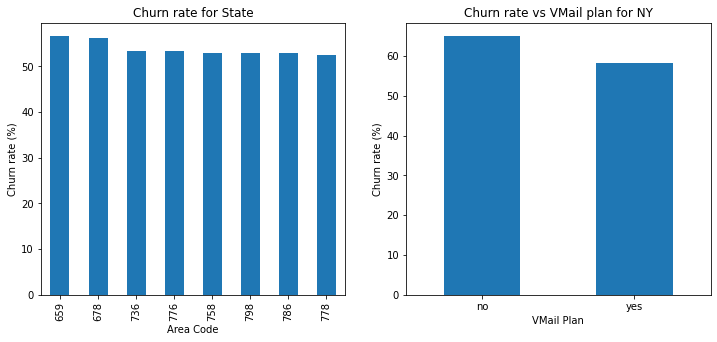

In [192]:
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
churn_df.groupby('Area Code').Churn.mean().sort_values(ascending=False).apply(lambda x: x*100)[:8].plot(kind='bar',ax=ar[0])
ar[0].set_ylabel("Churn rate (%)")
ar[0].set_title("Churn rate for State")
churn_df[churn_df.State=='NY'].groupby('VMail Plan').Churn.mean().apply(lambda x: x*100).plot(kind='bar',ax=ar[1])
plt.ylabel("Churn rate (%)")
plt.title("Churn rate vs VMail plan for NY")
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Intl Plan'>

Text(0.5, 1.0, 'Stacked Bar Chart of first ever bounce vs Risk')

Text(0.5, 0, 'Vmail Plan')

Text(0, 0.5, 'Churn proportion')

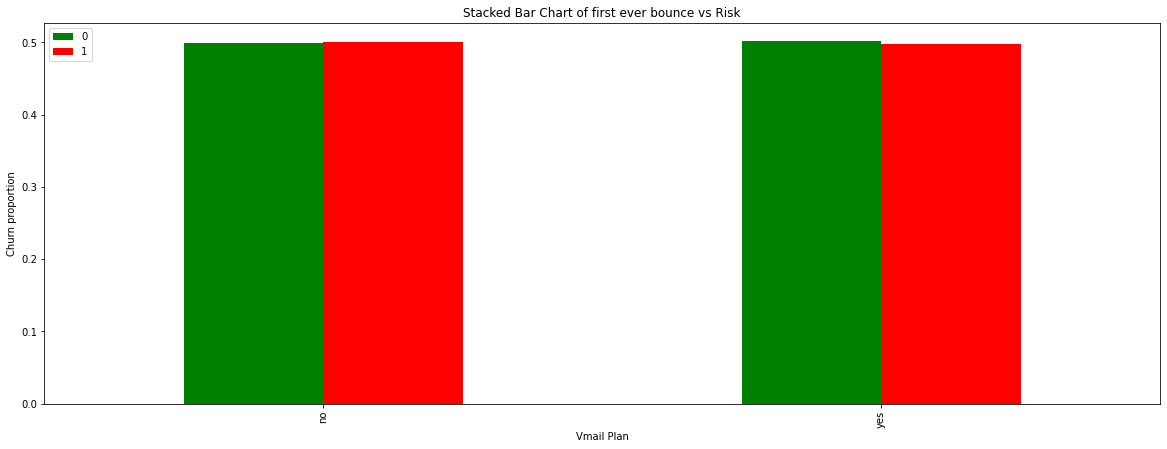

In [193]:

table=pd.crosstab(churn_df['Intl Plan'],churn_df.Churn)
table=table.sort_values(by=1, ascending=False)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False,color=['g','r'],figsize=(20,7))

plt.title('Stacked Bar Chart of first ever bounce vs Risk')
plt.xlabel('Vmail Plan')
plt.ylabel('Churn proportion')
plt.legend(loc='upper left')


<AxesSubplot:xlabel='State'>

Text(0.5, 1.0, 'Stacked Bar Chart of first ever bounce vs Risk')

Text(0.5, 0, 'Vmail Plan')

Text(0, 0.5, 'Churn proportion')

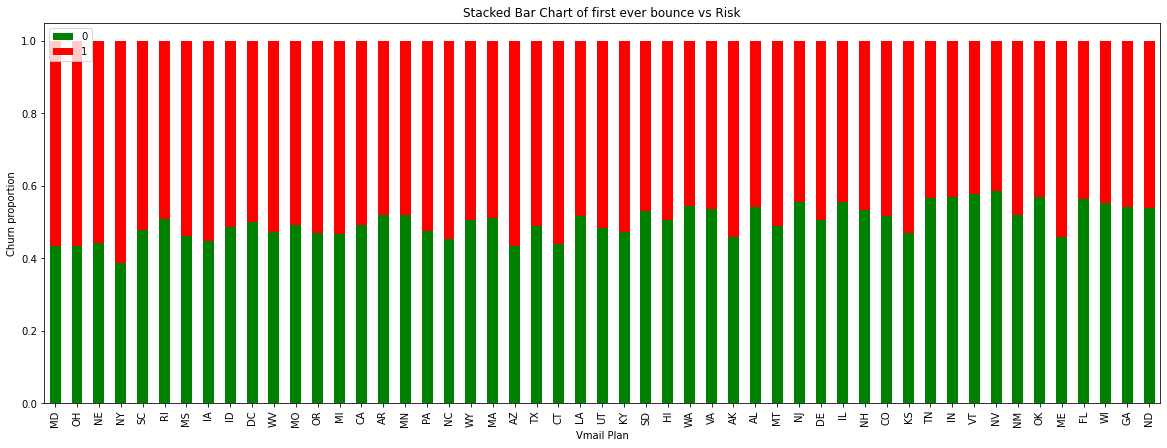

In [194]:

table=pd.crosstab(churn_df['State'],churn_df.Churn)
table=table.sort_values(by=1, ascending=False)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,color=['g','r'],figsize=(20,7))

plt.title('Stacked Bar Chart of first ever bounce vs Risk')
plt.xlabel('Vmail Plan')
plt.ylabel('Churn proportion')
plt.legend(loc='upper left')


## Feature selection

In [195]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif,chi2


In [196]:
churn_df['min_per_day_call']= churn_df['Day Mins']/churn_df['Day Calls']
churn_df['min_per_eve_call']= churn_df['Eve Mins']/churn_df['Eve Calls']
churn_df['min_per_night_call']= churn_df['Night Mins']/churn_df['Night Calls']
churn_df['min_per_Intl_call']= churn_df['Intl Mins']/churn_df['Intl Calls']

churn_df['charge_per_day_call']= churn_df['Day Charge']/churn_df['Day Calls']
churn_df['charge_per_eve_call']= churn_df['Eve Charge']/churn_df['Eve Calls']
churn_df['charge_per_night_call']= churn_df['Night Charge']/churn_df['Night Calls']
churn_df['charge_per_Intl_call']= churn_df['Intl Charge']/churn_df['Intl Calls']

churn_df['charge_per_day_min']= churn_df['Day Charge']/churn_df['Day Mins']
churn_df['charge_per_eve_min']= churn_df['Eve Charge']/churn_df['Eve Mins']
churn_df['charge_per_night_min']= churn_df['Night Charge']/churn_df['Night Mins']
churn_df['charge_per_Intl_min']= churn_df['Intl Charge']/churn_df['Intl Mins']

churn_df.charge_per_day_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_day_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_day_call).values.sum()
np.isinf(churn_df.min_per_day_call).values.sum()

churn_df.charge_per_eve_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_eve_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_eve_call).values.sum()
np.isinf(churn_df.min_per_eve_call).values.sum()

churn_df.charge_per_night_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_night_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_night_call).values.sum()
np.isinf(churn_df.min_per_night_call).values.sum()

churn_df.charge_per_Intl_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_Intl_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_Intl_call).values.sum()
np.isinf(churn_df.min_per_Intl_call).values.sum()



0

0

0

0

0

0

0

0

In [197]:
train_df=churn_df.copy()
train_df.drop(columns=['Phone','Area Code'],inplace=True)
train_df['VMail Plan']= np.where(train_df['VMail Plan']=='yes',1,0)
train_df['Intl Plan']= np.where(train_df['Intl Plan']=='yes',1,0)
num_cols=train_df.drop(columns=['Duration','Churn']).select_dtypes(exclude='object').columns.to_list()
cat_cols=train_df.drop(columns=['Duration','Churn']).select_dtypes(include='object').columns.to_list()

## Selecting features correlated to target 
and dropping highly correlated among input features

In [198]:
a=train_df[num_cols].join(train_df.Churn).corr(method="spearman").Churn.apply(lambda x: np.abs(x))
selcted_cols_1= a[(a>0.10) & (a<1)].index

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

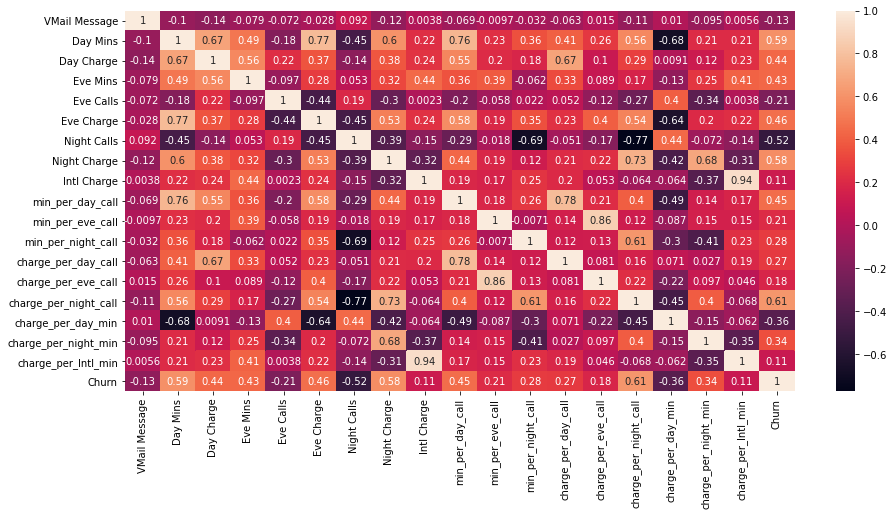

In [199]:
## Using SPEARMAN's method
plt.figure(figsize=(15,7))
sns.heatmap(train_df[selcted_cols_1].join(train_df.Churn).corr(method="spearman"),annot=True)

In [201]:
df_corr = train_df[selcted_cols_1].corr()
threshold = 0.8
tot_columns= df_corr[selcted_cols_1].columns.to_list()

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if  (a.loc[tot_columns[i]] > a.loc[tot_columns[j]]):
                columns[j] = False
            else :
                columns[i] = False  
selected_columns_2 = train_df[selcted_cols_1].columns[columns]
selected_columns_2
dropped_cols=list(set(selcted_cols_1)-set(selected_columns_2))
dropped_cols
#train_df = train_df[selected_columns]

Index(['VMail Message', 'Day Mins', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Charge',
       'min_per_day_call', 'min_per_eve_call', 'min_per_night_call',
       'charge_per_night_call', 'charge_per_day_min', 'charge_per_night_min'],
      dtype='object')

['charge_per_day_call', 'charge_per_Intl_min', 'charge_per_eve_call']

## Selecting Catagorical features

In [202]:
import scipy.stats as stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    p=stats.chi2_contingency(confusion_matrix)[1]
    print("Ch1,p",chi2,p)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
for col1 in cat_cols:
    for col2 in ['Churn']:
        cr=cramers_v(train_df[col1],train_df[col2])
        print('Cramers coefficient beween %s and %s: %.3f' %(col1,col2, cr))

## State is not related to Churn. So removing it     

final_filter_feature=selected_columns_2.to_list()

Ch1,p 39.45788764290883 0.857921662597329
Cramers coefficient beween State and Churn: 0.000
Ch1,p 65.49207511265321 5.834812625667519e-16
Cramers coefficient beween VMail Message Category and Churn: 0.114


## Selection based on RF

In [203]:
# ohe_encoder = OneHotEncoder(cols=cat_cols,use_cat_names=True) 
# encoded_train = ohe_encoder.fit_transform(train_df[num_cols+cat_cols]) 
# encoded_train=encoded_train.reset_index(drop=True)
# encoded_train.head()
# y_train=churn_df.Churn.to_list()

In [204]:

encoded_train = pd.get_dummies(data=train_df.drop(columns='Churn'),columns=cat_cols,sparse=False) 
encoded_train=encoded_train.reset_index(drop=True)
encoded_train.head()
y_train=churn_df.Churn.to_list()

,Duration,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,CustServ Calls Bin,min_per_day_call,min_per_eve_call,min_per_night_call,min_per_Intl_call,charge_per_day_call,charge_per_eve_call,charge_per_night_call,charge_per_Intl_call,charge_per_day_min,charge_per_eve_min,charge_per_night_min,charge_per_Intl_min,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,VMail Message Category_Less than 200 msgs,VMail Message Category_More than 200 msgs
0,163,0,1,300,8.1622,3,7.5792,3.9330,4,6.5086,4.0658,100,5.1116,4.9282,6,5.6732,3,1,2.7207,0.9833,0.0407,0.8214,2.5264,1.6272,0.0511,0.9455,0.9286,1.6549,1.2572,1.1512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,15,1,0,0,10.0190,4,4.2263,2.3250,0,9.9726,7.1410,200,6.4362,3.2217,6,2.5597,8,1,2.5047,0.0000,0.0357,0.5370,1.0566,0.0000,0.0322,0.4266,0.4218,4.2893,0.9013,0.7945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,131,0,1,300,4.7085,3,4.7682,4.5375,3,4.5667,5.3632,100,5.1425,7.1390,2,6.2542,4,1,1.5695,1.5125,0.0536,3.5695,1.5894,1.5222,0.0514,3.1271,1.0127,1.0064,0.9588,0.8761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,75,1,1,700,1.2687,3,2.5676,2.5287,5,2.3336,3.7736,450,3.8144,2.2458,6,1.0807,6,1,0.4229,0.5057,0.0084,0.3743,0.8559,0.4667,0.0085,0.1801,2.0238,0.9228,1.0108,0.4812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,146,1,0,0,2.6962,3,5.9089,6.0153,3,3.6704,3.7517,250,2.7968,6.9055,4,7.1343,6,1,0.8987,2.0051,0.0150,1.7264,1.9696,1.2235,0.0112,1.7836,2.1916,0.6102,0.7455,1.0331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [205]:
rftree=RandomForestClassifier(criterion='entropy')
rftree.fit(encoded_train,y_train)

RandomForestClassifier(criterion='entropy')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='importance', ylabel='features'>

Text(0.5, 1.0, 'RANDOM FORESTFEATURE IMPORTANCE')

Text(0.5, 0, 'FEATURE IMPORTANCE (TOP-15)')

Text(0, 0.5, 'FEATURE NAMES')

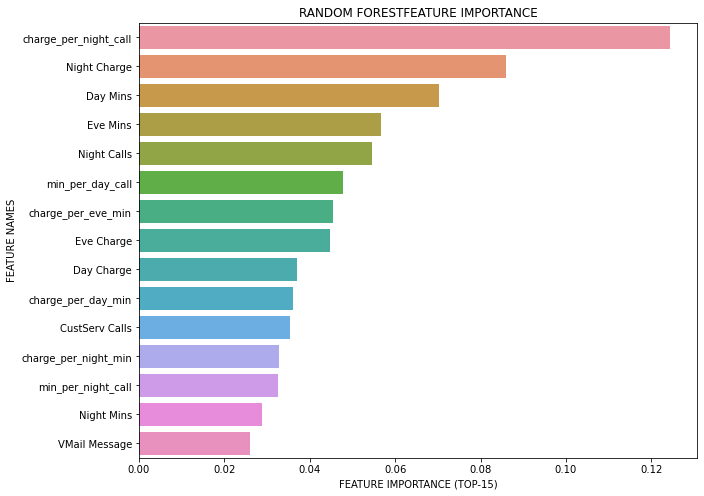

In [206]:
clust_cols=encoded_train.columns

feat_imp_df=pd.DataFrame({'features':clust_cols,
                          'importance':rftree.feature_importances_})
feat_imp_df.sort_values(by=['importance'], ascending=False,inplace=True)
#print(feat_imp_df.sort_values('importance',ascending=False).iloc[:25])
feat_imp_df=feat_imp_df.sort_values('importance',ascending=False).iloc[:15]
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=feat_imp_df['importance'], y=feat_imp_df['features'])
#Add chart labels
plt.title('RANDOM FOREST' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE (TOP-15)')
plt.ylabel('FEATURE NAMES')

### Final 15 features
final_rf_feature=feat_imp_df.features.to_list()

## Feature selection based on RFE

In [207]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [208]:

#lgr=LogisticRegression()
xgb=XGBClassifier()
#rfe = RFECV(estimator=lgr,step=1,cv=5)
rfe = RFE(estimator=xgb,n_features_to_select=15,step=1)
rfe = rfe.fit(encoded_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

final_rfe_feature= encoded_train.columns[rfe.support_]
final_rfe_feature


[22:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Index(['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Intl Calls',
       'CustServ Calls', 'min_per_night_call', 'charge_per_night_call',
       'charge_per_Intl_call', 'charge_per_day_min', 'charge_per_eve_min'],
      dtype='object')

## Features for Duration of stay

<AxesSubplot:xlabel='Duration', ylabel='Night Charge'>

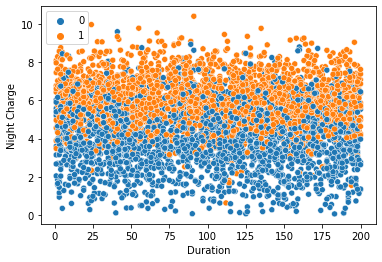

In [209]:
sns.scatterplot(churn_df['Duration'],churn_df['Night Charge'],hue=churn_df.Churn)
plt.legend()

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
encoded_train = pd.get_dummies(data=train_df.drop(columns=['Churn','Duration']),columns=cat_cols,sparse=False) 
encoded_train=encoded_train.reset_index(drop=True)
encoded_train.head()
y_duration=train_df.Duration.to_list()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,CustServ Calls Bin,min_per_day_call,min_per_eve_call,min_per_night_call,min_per_Intl_call,charge_per_day_call,charge_per_eve_call,charge_per_night_call,charge_per_Intl_call,charge_per_day_min,charge_per_eve_min,charge_per_night_min,charge_per_Intl_min,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,VMail Message Category_Less than 200 msgs,VMail Message Category_More than 200 msgs
0,0,1,300,8.1622,3,7.5792,3.9330,4,6.5086,4.0658,100,5.1116,4.9282,6,5.6732,3,1,2.7207,0.9833,0.0407,0.8214,2.5264,1.6272,0.0511,0.9455,0.9286,1.6549,1.2572,1.1512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,10.0190,4,4.2263,2.3250,0,9.9726,7.1410,200,6.4362,3.2217,6,2.5597,8,1,2.5047,0.0000,0.0357,0.5370,1.0566,0.0000,0.0322,0.4266,0.4218,4.2893,0.9013,0.7945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,300,4.7085,3,4.7682,4.5375,3,4.5667,5.3632,100,5.1425,7.1390,2,6.2542,4,1,1.5695,1.5125,0.0536,3.5695,1.5894,1.5222,0.0514,3.1271,1.0127,1.0064,0.9588,0.8761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,700,1.2687,3,2.5676,2.5287,5,2.3336,3.7736,450,3.8144,2.2458,6,1.0807,6,1,0.4229,0.5057,0.0084,0.3743,0.8559,0.4667,0.0085,0.1801,2.0238,0.9228,1.0108,0.4812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1,0,0,2.6962,3,5.9089,6.0153,3,3.6704,3.7517,250,2.7968,6.9055,4,7.1343,6,1,0.8987,2.0051,0.0150,1.7264,1.9696,1.2235,0.0112,1.7836,2.1916,0.6102,0.7455,1.0331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [265]:
lm=LinearRegression()
rfe = RFECV(estimator=lm,step=1,cv=5)
X_train=StandardScaler().fit_transform(encoded_train)
X_train.shape
Y_train=y_duration
rfe = rfe.fit(X_train, Y_train)
# print(rfe.support_)
# print(rfe.ranking_)

final_duration_feature= encoded_train.columns[rfe.support_]
final_duration_feature=['VMail Plan', 'Day Mins', 'Eve Calls', 'Night Calls', 'Night Charge',
'Intl Mins', 'min_per_eve_call', 'min_per_Intl_call','charge_per_day_call', 'charge_per_Intl_call', 'charge_per_Intl_min',
 'State','VMail Message Category' ]


(5000, 82)

## Survival Fuction Graph

In [213]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5000 total observations, 2502 right-censored observations>

<AxesSubplot:xlabel='timeline'>

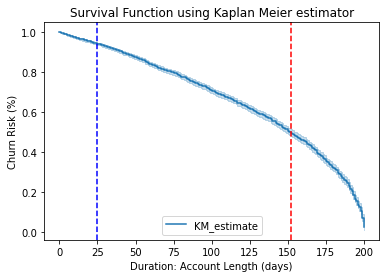

In [214]:
kmf = KaplanMeierFitter()

kmf.fit(churn_df['Duration'], event_observed=churn_df['Churn'])

kmf.plot_survival_function()
_=plt.title('Survival Function using Kaplan Meier estimator');
_=plt.xlabel("Duration: Account Length (days)")
_=plt.ylabel("Churn Risk (%)")
_=plt.axvline(x=25, color='blue', linestyle='--')
_=plt.axvline(x=kmf.median_survival_time_, color='red', linestyle='--')

## Model Building and Evaluation 

In [215]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import DataConversionWarning
import xgboost as xgb
import nonparametric
import util
import metrics

In [279]:

def _get_x_y_survival(dataset, col_event, col_time, val_outcome):
    if col_event is None or col_time is None:
        y = None
        x_frame = dataset
    else:
        y = np.empty(dtype=[(col_event, bool), (col_time, np.float64)],
                        shape=dataset.shape[0])
        y[col_event] = (dataset[col_event] == val_outcome).values
        y[col_time] = dataset[col_time].values

        x_frame = dataset.drop([col_event, col_time], axis=1)

    return x_frame, y


def _get_x_y_other(dataset, col_label):
    if col_label is None:
        y = None
        x_frame = dataset
    else:
        y = dataset.loc[:, col_label]
        x_frame = dataset.drop(col_label, axis=1)

    return x_frame, y


def get_x_y(data_frame, attr_labels, pos_label=None, survival=True):
    """Split data frame into features and labels.
    Parameters
    ----------
    data_frame : pandas.DataFrame, shape = (n_samples, n_columns)
        A data frame.
    attr_labels : sequence of str or None
        A list of one or more columns that are considered the label.
        If `survival` is `True`, then attr_labels has two elements:
        1) the name of the column denoting the event indicator, and
        2) the name of the column denoting the survival time.
        If the sequence contains `None`, then labels are not retrieved
        and only a data frame with features is returned.
    pos_label : any, optional
        Which value of the event indicator column denotes that a
        patient experienced an event. This value is ignored if
        `survival` is `False`.
    survival : bool, optional, default: True
        Whether to return `y` that can be used for survival analysis.
    Returns
    -------
    X : pandas.DataFrame, shape = (n_samples, n_columns - len(attr_labels))
        Data frame containing features.
    y : None or pandas.DataFrame, shape = (n_samples, len(attr_labels))
        Data frame containing columns with supervised information.
        If `survival` was `True`, then the column denoting the event
        indicator will be boolean and survival times will be float.
        If `attr_labels` contains `None`, y is set to `None`.
    """
    if survival:
        if len(attr_labels) != 2:
            raise ValueError("expected sequence of length two for attr_labels, but got %d" % len(attr_labels))
        if pos_label is None:
            raise ValueError("pos_label needs to be specified if survival=True")
        return _get_x_y_survival(data_frame, attr_labels[0], attr_labels[1], pos_label)

    return _get_x_y_other(data_frame, attr_labels)

# def survival_y_cox(dframe:pd.DataFrame) -> np.array:
#     """Returns array of outcome encoded for XGB"""
#     y_survival = []

#     for idx, row in dframe[["Duration", "Churn"]].iterrows():
#         if row["Churn"]:
#             # uncensored
#             y_survival.append(int(row["Duration"]))
#         else:
#             # right censored
#             y_survival.append(-int(row["Duration"]))
#     return np.array(y_survival)

def survival_y_cox(dframe:pd.DataFrame) -> np.array:
    """Returns array of outcome encoded for XGB"""
    y_survival = []

    for idx, row in dframe[["duration", "churn"]].iterrows():
        if row["churn"]:
            # uncensored
            y_survival.append(int(row["duration"]))
        else:
            # right censored
            y_survival.append(-int(row["duration"]))
    return np.array(y_survival)

## Training  the base model 

In [280]:
x=churn_df_copy.drop('Phone',1).copy()
new_col_names = [s.lower().replace(" ","_").replace("'","") for s in x.columns.tolist()]
x.columns = new_col_names
df_train, df_test = train_test_split(x , test_size=0.20, random_state=123)

df_train['area_code'] = df_train['area_code'].astype('category')
df_test['area_code'] = df_test['area_code'].astype('category')
numerical_idx = (
        df_train.select_dtypes(exclude=["object", "category"])
        .drop(['churn','duration'],1)
        .columns.tolist()
    )

categorical_idx = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

train_features = preprocessor.fit_transform(df_train.drop(columns=['churn','duration']))
test_features = preprocessor.transform(df_test.drop(['churn','duration'],1))


feature_names = np.hstack((np.array(numerical_idx),
                           preprocessor.transformers_[1][1]['onehot'].get_feature_names()))
dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(df_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(df_test), feature_names=feature_names
)


params = {
    "eta": 0.1,
    "max_depth": 3, 
    "objective": " 2",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst_base = xgb.train(
    params,
    dm_train,
    num_boost_round=500,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10)

[0]	train-cox-nloglik:7.25295	test-cox-nloglik:5.87105
[10]	train-cox-nloglik:7.00243	test-cox-nloglik:5.59587
[20]	train-cox-nloglik:6.91218	test-cox-nloglik:5.49933
[30]	train-cox-nloglik:6.86277	test-cox-nloglik:5.44917
[40]	train-cox-nloglik:6.83634	test-cox-nloglik:5.43400
[50]	train-cox-nloglik:6.81418	test-cox-nloglik:5.42694
[60]	train-cox-nloglik:6.79375	test-cox-nloglik:5.42062
[70]	train-cox-nloglik:6.77578	test-cox-nloglik:5.41746
[76]	train-cox-nloglik:6.76804	test-cox-nloglik:5.41573


CIC
(0.7416333720204303, 175037, 61011, 0, 1218)
Brier Score
[0.326800]


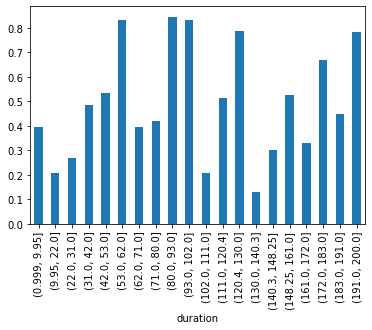

In [281]:
df_test.loc[:,"preds"] = bst_base.predict(dm_test, output_margin=True) 
df_test.loc[:, "preds_exp"] = bst_base.predict(dm_test, output_margin=False)
_=df_test.groupby(pd.qcut(df_test['duration'], q=20))['preds_exp'].median().plot(kind="bar")

_, y_train = get_x_y(df_train,['churn','duration'],pos_label=True)
_, y_test = get_x_y(df_test,['churn','duration'],pos_label=True)


print("CIC")
print(
    metrics.concordance_index_ipcw(
       y_train,
       y_test,
      df_test['preds'],
        tau=100 # within 100 days
    )
)

print("Brier Score")
times, score = metrics.brier_score(
y_train,y_test, df_test['preds'], df_test['duration'].max() - 1
)
print(score)


## Training  the RFE based model without any optimization

In [293]:
x=churn_df[final_rfe_feature.tolist() +['Churn','Duration']].copy()
new_col_names = [s.lower().replace(" ","_").replace("'","") for s in x.columns.tolist()]
x.columns = new_col_names
df_train, df_test = train_test_split(x , test_size=0.20, random_state=123)

# df_train['area_code'] = df_train['area_code'].astype('category')
# df_test['area_code'] = df_test['area_code'].astype('category')
numerical_idx = (
        df_train.select_dtypes(exclude=["object", "category"])
        .drop(['churn','duration'],1)
        .columns.tolist()
    )

categorical_idx = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

train_features = preprocessor.fit_transform(df_train.drop(columns=['churn','duration']))
test_features = preprocessor.transform(df_test.drop(['churn','duration'],1))



feature_names = np.hstack((np.array(numerical_idx)))
dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(df_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(df_test), feature_names=feature_names
)


params = {
    "eta": 0.1,
    "max_depth": 3, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst_rfe = xgb.train(
    params,
    dm_train,
    num_boost_round=500,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10)

[0]	train-cox-nloglik:7.25043	test-cox-nloglik:5.86284
[10]	train-cox-nloglik:6.99200	test-cox-nloglik:5.59048
[20]	train-cox-nloglik:6.90272	test-cox-nloglik:5.49523
[30]	train-cox-nloglik:6.85198	test-cox-nloglik:5.44999
[40]	train-cox-nloglik:6.82501	test-cox-nloglik:5.42783
[50]	train-cox-nloglik:6.80248	test-cox-nloglik:5.41754
[60]	train-cox-nloglik:6.78160	test-cox-nloglik:5.40773
[70]	train-cox-nloglik:6.76654	test-cox-nloglik:5.40680
[73]	train-cox-nloglik:6.76076	test-cox-nloglik:5.40700


Text(0, 0.5, 'Risk Score')

Text(0.5, 0, 'Duration (days)')

Text(0.5, 1.0, 'Distribution of risk over time')

CIC
(0.7582327603217743, 177778, 58269, 1, 1218)
Brier Score
[0.235846]


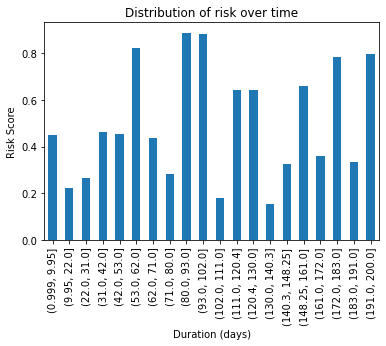

In [294]:
df_test.loc[:,"preds"] = bst_rfe.predict(dm_test, output_margin=True) 
df_test.loc[:, "preds_exp"] = bst_rfe.predict(dm_test, output_margin=False)

_=df_test.groupby(pd.qcut(df_test['duration'], q=20))['preds_exp'].median().plot(kind="bar")
plt.ylabel("Risk Score")
plt.xlabel("Duration (days)")
plt.title("Distribution of risk over time")
_, y_train = get_x_y(df_train,['churn','duration'],pos_label=True)
_, y_test = get_x_y(df_test,['churn','duration'],pos_label=True)


print("CIC")
print(
    metrics.concordance_index_ipcw(
       y_train,
       y_test,
      df_test['preds'],
        tau=100 # within 100 days
    )
)

print("Brier Score")
times, score = metrics.brier_score(
y_train,y_test, df_test['preds'], df_test['duration'].max() - 1
)
print(score)

## Training  the filter based model

In [284]:
x=churn_df[final_filter_feature +['Churn','Duration']].copy()
new_col_names = [s.lower().replace(" ","_").replace("'","") for s in x.columns.tolist()]
x.columns = new_col_names
df_train, df_test = train_test_split(x , test_size=0.20, random_state=123)

# df_train['area_code'] = df_train['area_code'].astype('category')
# df_test['area_code'] = df_test['area_code'].astype('category')
numerical_idx = (
        df_train.select_dtypes(exclude=["object", "category"])
        .drop(['churn','duration'],1)
        .columns.tolist()
    )

categorical_idx = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

train_features = preprocessor.fit_transform(df_train.drop(columns=['churn','duration']))
test_features = preprocessor.transform(df_test.drop(['churn','duration'],1))


feature_names = np.hstack((np.array(numerical_idx)))
dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(df_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(df_test), feature_names=feature_names
)


params = {
    "eta": 0.1,
    "max_depth": 3, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst_filter = xgb.train(
    params,
    dm_train,
    num_boost_round=500,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10)

[0]	train-cox-nloglik:7.25043	test-cox-nloglik:5.86284
[10]	train-cox-nloglik:6.99334	test-cox-nloglik:5.59489
[20]	train-cox-nloglik:6.91080	test-cox-nloglik:5.51060
[30]	train-cox-nloglik:6.87057	test-cox-nloglik:5.47930
[40]	train-cox-nloglik:6.84819	test-cox-nloglik:5.46251
[50]	train-cox-nloglik:6.82898	test-cox-nloglik:5.45529
[60]	train-cox-nloglik:6.80928	test-cox-nloglik:5.44459
[70]	train-cox-nloglik:6.79588	test-cox-nloglik:5.44341
[80]	train-cox-nloglik:6.77817	test-cox-nloglik:5.43690
[90]	train-cox-nloglik:6.76298	test-cox-nloglik:5.43828
[100]	train-cox-nloglik:6.74682	test-cox-nloglik:5.44041
[105]	train-cox-nloglik:6.74088	test-cox-nloglik:5.43732


CIC
(0.7442610195915985, 175447, 60600, 1, 1218)
Brier Score
[0.375744]


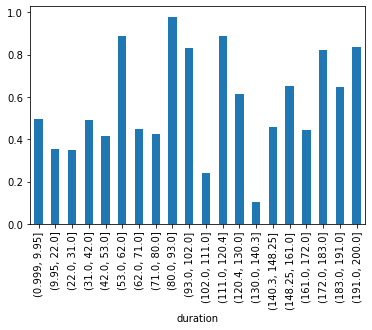

In [285]:
df_test.loc[:,"preds"] = bst_filter.predict(dm_test, output_margin=True) 
df_test.loc[:, "preds_exp"] = bst_filter.predict(dm_test, output_margin=False)
_=df_test.groupby(pd.qcut(df_test['duration'], q=20))['preds_exp'].median().plot(kind="bar")

_, y_train = get_x_y(df_train,['churn','duration'],pos_label=True)
_, y_test = get_x_y(df_test,['churn','duration'],pos_label=True)


print("CIC")
print(
    metrics.concordance_index_ipcw(
       y_train,
       y_test,
      df_test['preds'],
        tau=100 # within 100 days
    )
)

print("Brier Score")
times, score = metrics.brier_score(
y_train,y_test, df_test['preds'], df_test['duration'].max() - 1
)
print(score)

## Training  the RF based model

In [286]:
x=churn_df[final_rf_feature +['Churn','Duration']].copy()
new_col_names = [s.lower().replace(" ","_").replace("'","") for s in x.columns.tolist()]
x.columns = new_col_names
df_train, df_test = train_test_split(x , test_size=0.20, random_state=123)

# df_train['area_code'] = df_train['area_code'].astype('category')
# df_test['area_code'] = df_test['area_code'].astype('category')
numerical_idx = (
        df_train.select_dtypes(exclude=["object", "category"])
        .drop(['churn','duration'],1)
        .columns.tolist()
    )

categorical_idx = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

train_features = preprocessor.fit_transform(df_train.drop(columns=['churn','duration']))
test_features = preprocessor.transform(df_test.drop(['churn','duration'],1))


feature_names = np.hstack((np.array(numerical_idx)))
dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(df_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(df_test), feature_names=feature_names
)


params = {
    "eta": 0.02,
    "max_depth": 4, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst_rf = xgb.train(
    params,
    dm_train,
    num_boost_round=1000,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10)

[0]	train-cox-nloglik:7.29141	test-cox-nloglik:5.90955
[10]	train-cox-nloglik:7.18645	test-cox-nloglik:5.80265
[20]	train-cox-nloglik:7.10999	test-cox-nloglik:5.72558
[30]	train-cox-nloglik:7.05179	test-cox-nloglik:5.66651
[40]	train-cox-nloglik:7.00621	test-cox-nloglik:5.62022
[50]	train-cox-nloglik:6.96698	test-cox-nloglik:5.58137
[60]	train-cox-nloglik:6.93623	test-cox-nloglik:5.55123
[70]	train-cox-nloglik:6.91055	test-cox-nloglik:5.52729
[80]	train-cox-nloglik:6.88937	test-cox-nloglik:5.50799
[90]	train-cox-nloglik:6.87209	test-cox-nloglik:5.49237
[100]	train-cox-nloglik:6.85625	test-cox-nloglik:5.47896
[110]	train-cox-nloglik:6.84248	test-cox-nloglik:5.46671
[120]	train-cox-nloglik:6.83124	test-cox-nloglik:5.45774
[130]	train-cox-nloglik:6.81978	test-cox-nloglik:5.44907
[140]	train-cox-nloglik:6.81008	test-cox-nloglik:5.44233
[150]	train-cox-nloglik:6.80154	test-cox-nloglik:5.43578
[160]	train-cox-nloglik:6.79282	test-cox-nloglik:5.42960
[170]	train-cox-nloglik:6.78546	test-cox-n

CIC
(0.7544750608096163, 177740, 58308, 0, 1218)
Brier Score
[0.286874]


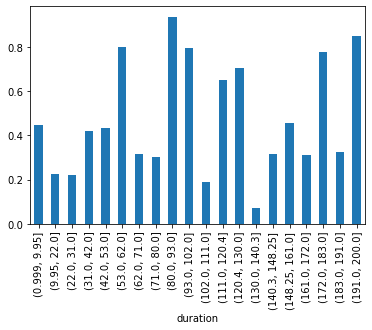

In [287]:
df_test.loc[:,"preds"] = bst_rf.predict(dm_test, output_margin=True) 
df_test.loc[:, "preds_exp"] = bst_rf.predict(dm_test, output_margin=False)
_=df_test.groupby(pd.qcut(df_test['duration'], q=20))['preds_exp'].median().plot(kind="bar")

_, y_train = get_x_y(df_train,['churn','duration'],pos_label=True)
_, y_test = get_x_y(df_test,['churn','duration'],pos_label=True)


print("CIC")
print(
    metrics.concordance_index_ipcw(
       y_train,
       y_test,
      df_test['preds'],
        tau=100 # within 100 days
    )
)

print("Brier Score")
times, score = metrics.brier_score(
y_train,y_test, df_test['preds'], df_test['duration'].max() - 1
)
print(score)

## Training  the Linear Regression based model

In [288]:
x=churn_df[final_duration_feature +['Churn','Duration']].copy()
new_col_names = [s.lower().replace(" ","_").replace("'","") for s in x.columns.tolist()]
x.columns = new_col_names
df_train, df_test = train_test_split(x , test_size=0.20, random_state=123)

# df_train['area_code'] = df_train['area_code'].astype('category')
# df_test['area_code'] = df_test['area_code'].astype('category')
numerical_idx = (
        df_train.select_dtypes(exclude=["object", "category"])
        .drop(['churn','duration'],1)
        .columns.tolist()
    )

categorical_idx = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )


train_features = preprocessor.fit_transform(df_train.drop(columns=['churn','duration']))
test_features = preprocessor.transform(df_test.drop(['churn','duration'],1))



feature_names = np.hstack((np.array(numerical_idx),
                           preprocessor.transformers_[1][1]['onehot'].get_feature_names()))

dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(df_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(df_test), feature_names=feature_names
)


params = {
    "eta": 0.01,
    "max_depth": 4, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst_lr = xgb.train(
    params,
    dm_train,
    num_boost_round=1000,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10)

[0]	train-cox-nloglik:7.29872	test-cox-nloglik:5.91687
[10]	train-cox-nloglik:7.24952	test-cox-nloglik:5.86497
[20]	train-cox-nloglik:7.20819	test-cox-nloglik:5.82109
[30]	train-cox-nloglik:7.17219	test-cox-nloglik:5.78254
[40]	train-cox-nloglik:7.14061	test-cox-nloglik:5.74950
[50]	train-cox-nloglik:7.11320	test-cox-nloglik:5.72089
[60]	train-cox-nloglik:7.08926	test-cox-nloglik:5.69559
[70]	train-cox-nloglik:7.06837	test-cox-nloglik:5.67363
[80]	train-cox-nloglik:7.04987	test-cox-nloglik:5.65430
[90]	train-cox-nloglik:7.03294	test-cox-nloglik:5.63694
[100]	train-cox-nloglik:7.01773	test-cox-nloglik:5.62108
[110]	train-cox-nloglik:7.00411	test-cox-nloglik:5.60724
[120]	train-cox-nloglik:6.99142	test-cox-nloglik:5.59471
[130]	train-cox-nloglik:6.97990	test-cox-nloglik:5.58386
[140]	train-cox-nloglik:6.96945	test-cox-nloglik:5.57425
[150]	train-cox-nloglik:6.96055	test-cox-nloglik:5.56626
[160]	train-cox-nloglik:6.95208	test-cox-nloglik:5.55810
[170]	train-cox-nloglik:6.94445	test-cox-n

CIC
(0.7232552701944645, 170734, 65314, 0, 1218)
Brier Score
[0.427162]


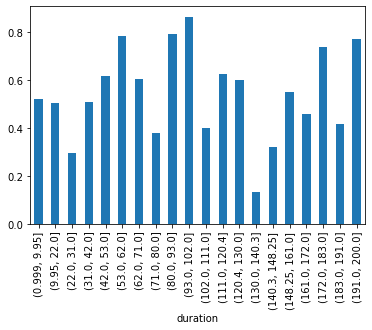

In [289]:
df_test.loc[:,"preds"] = bst_lr.predict(dm_test, output_margin=True) 
df_test.loc[:, "preds_exp"] = bst_lr.predict(dm_test, output_margin=False)
_=df_test.groupby(pd.qcut(df_test['duration'], q=20))['preds_exp'].median().plot(kind="bar")

_, y_train = get_x_y(df_train,['churn','duration'],pos_label=True)
_, y_test = get_x_y(df_test,['churn','duration'],pos_label=True)


print("CIC")
print(
    metrics.concordance_index_ipcw(
       y_train,
       y_test,
      df_test['preds'],
        tau=100 # within 100 days
    )
)

print("Brier Score")
times, score = metrics.brier_score(
y_train,y_test, df_test['preds'], df_test['duration'].max() - 1
)
print(score)

## Shape value Analysis

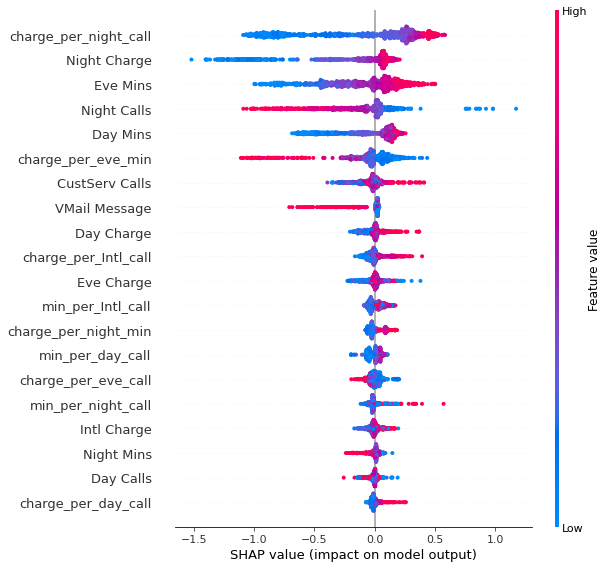

In [220]:
import shap
explainer = shap.TreeExplainer(bst, feature_names=feature_names)
shap_values = explainer.shap_values(test_features) 

shap.summary_plot(shap_values, pd.DataFrame(test_features, columns=feature_names))

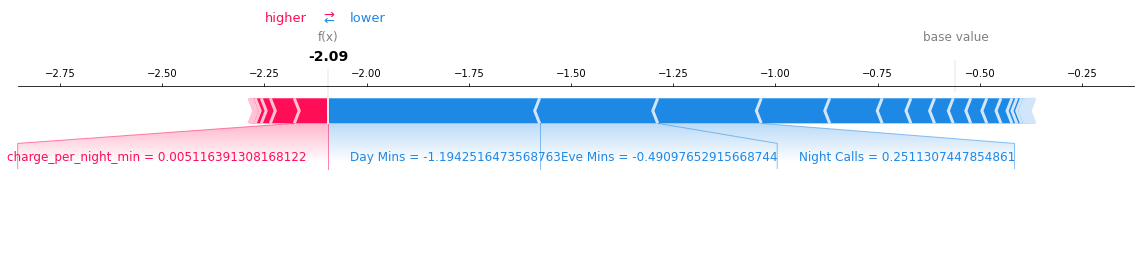

The real label is Churn=47.0


In [222]:
idx_sample = 128
shap.force_plot(
    explainer.expected_value,
    shap_values[idx_sample, :],
    pd.DataFrame(test_features, columns=feature_names).iloc[idx_sample, :],
    matplotlib=True,
)

print(f"The real label is Churn={X_test.iloc[idx_sample][0]}")

<AxesSubplot:>

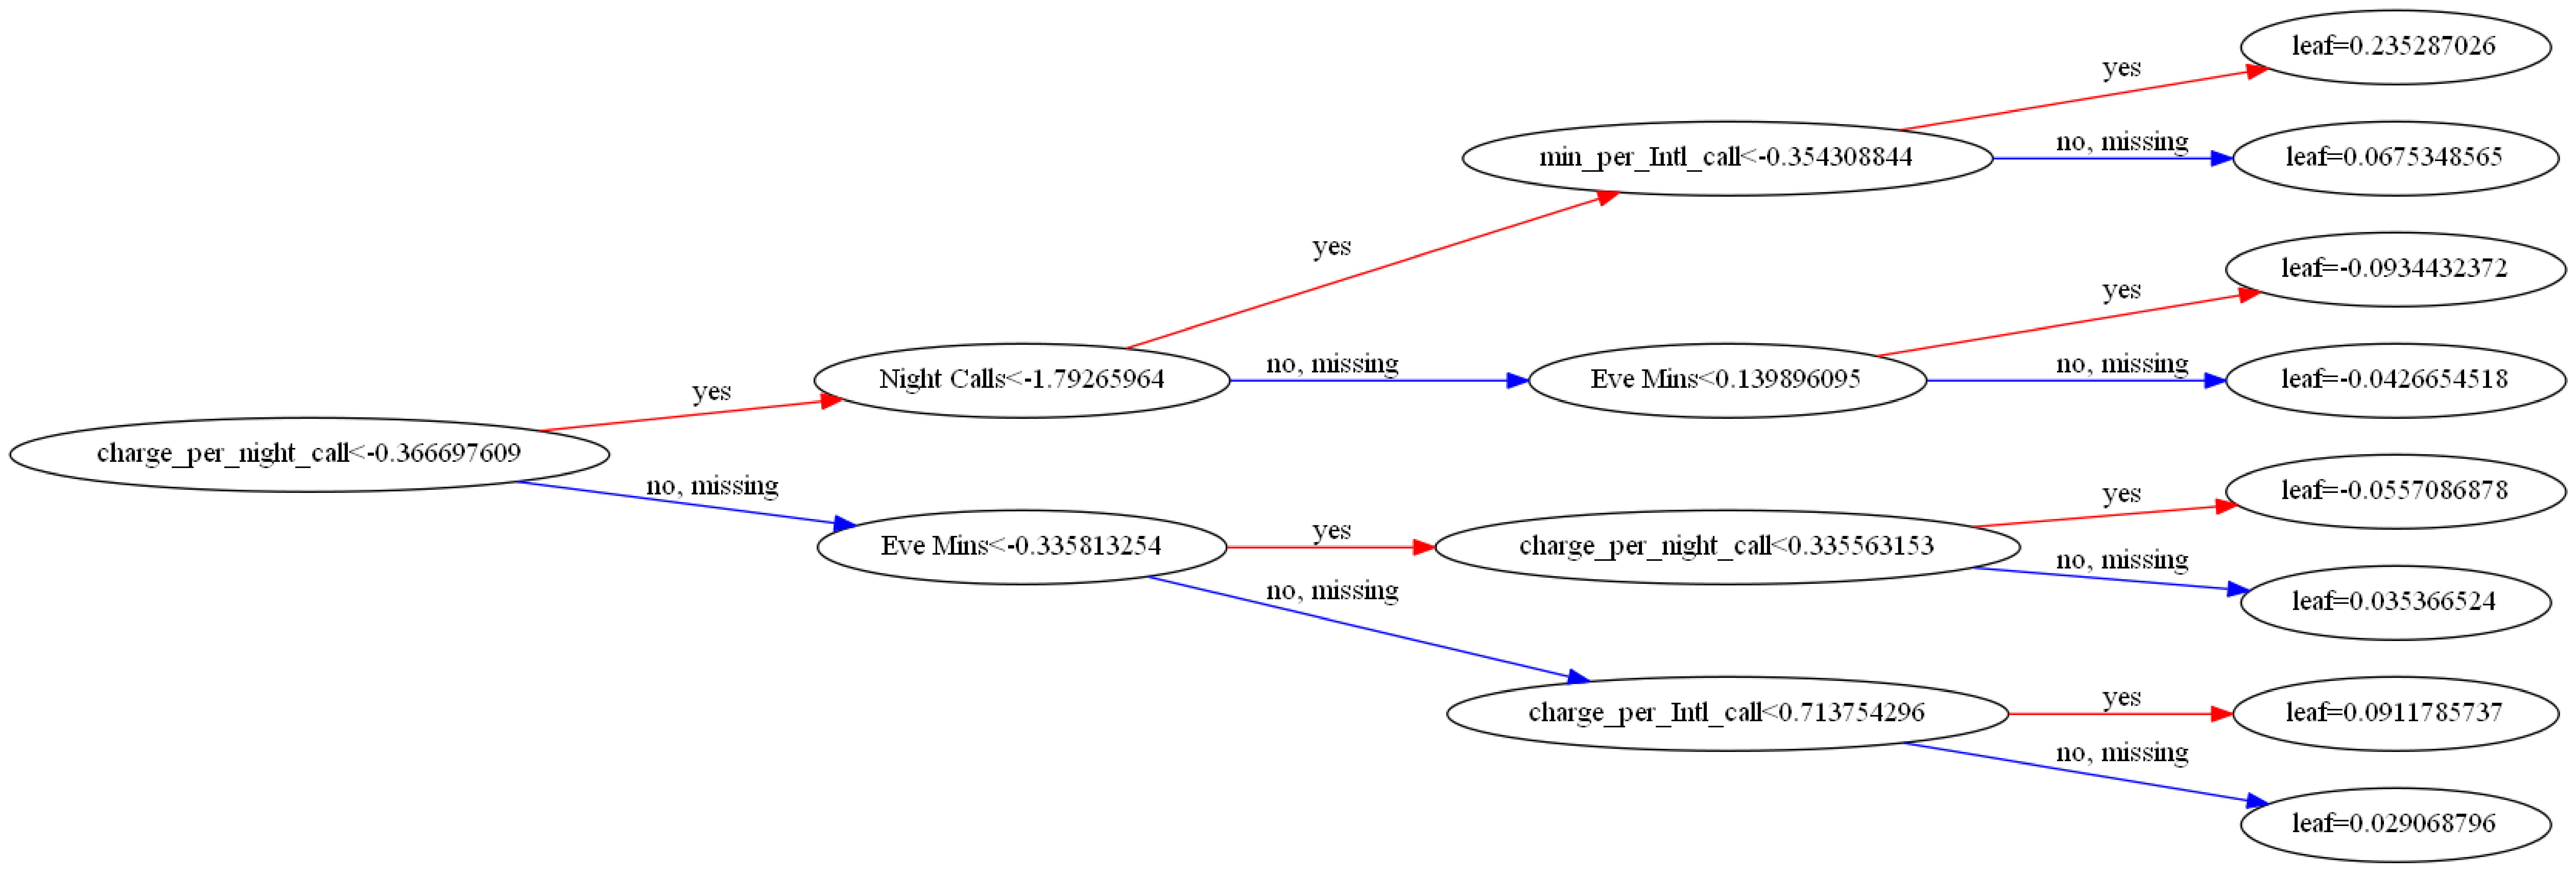

In [224]:
xgb.plot_tree(bst, rankdir="LR", num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig("tree.png", bbox_inches="tight")